<a href="https://colab.research.google.com/github/dcw8161/-MAGIC-Gamma-Telescope/blob/main/MAGIC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [2]:
pd.read_csv("/content/magic04.data")

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/content/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"]=="g").astype(int)

In [6]:
df["class"].unique()

array([1, 0])

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [8]:
df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0

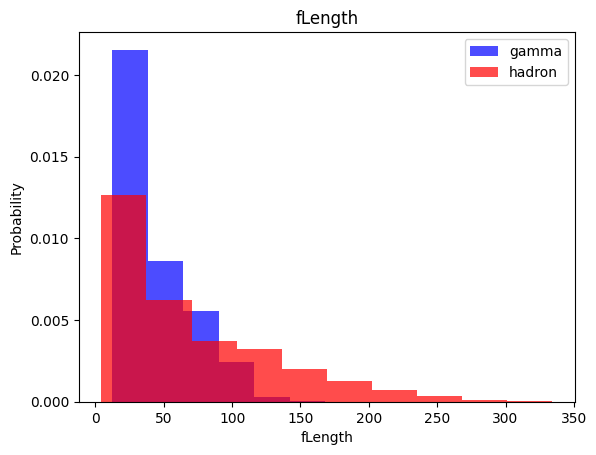

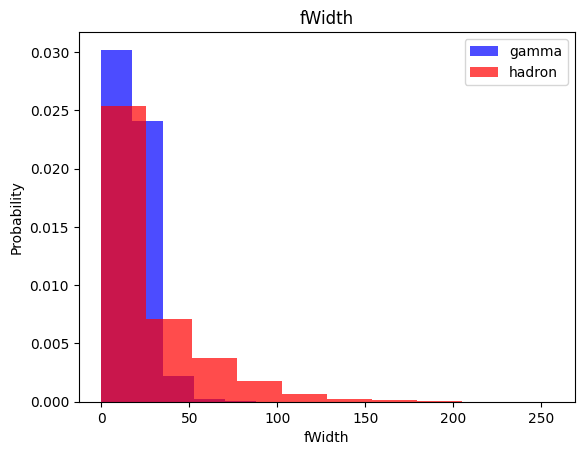

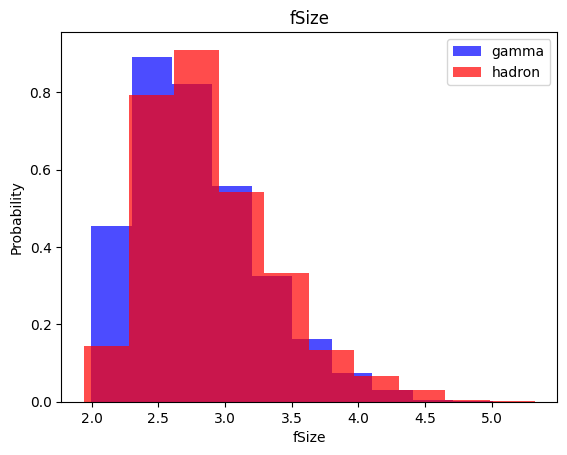

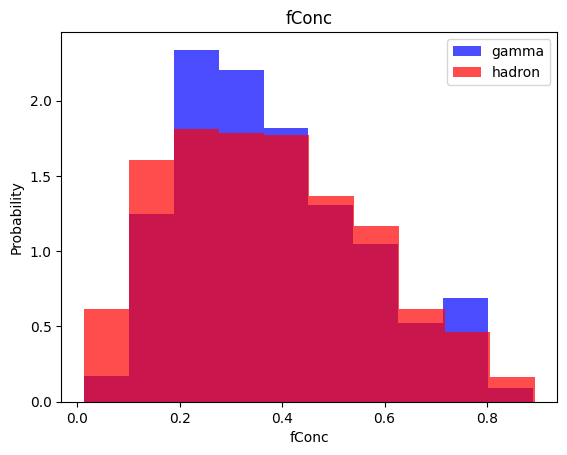

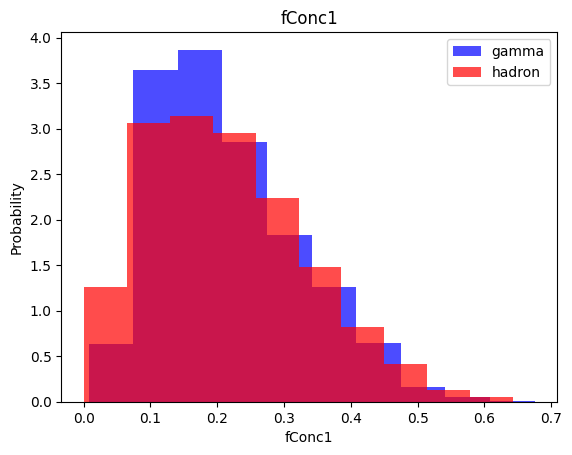

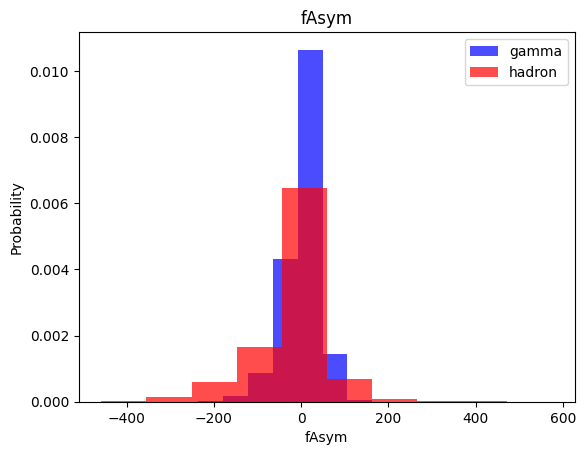

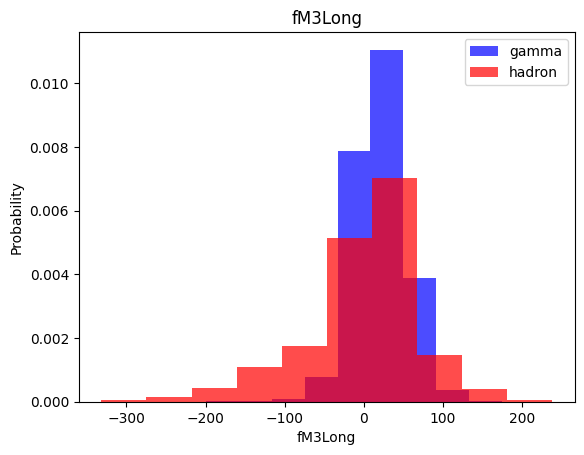

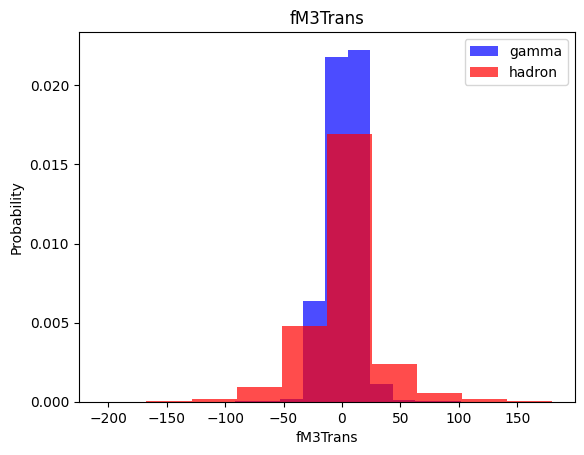

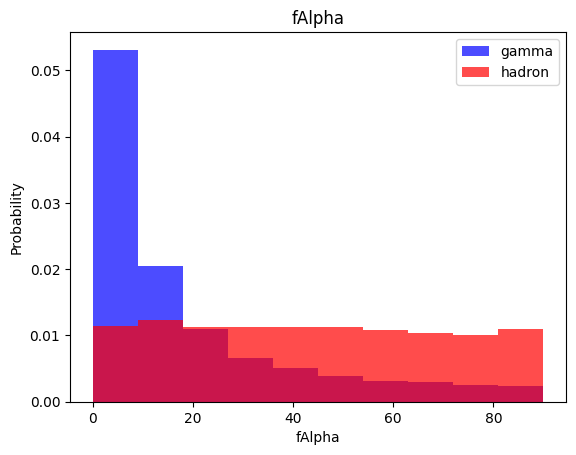

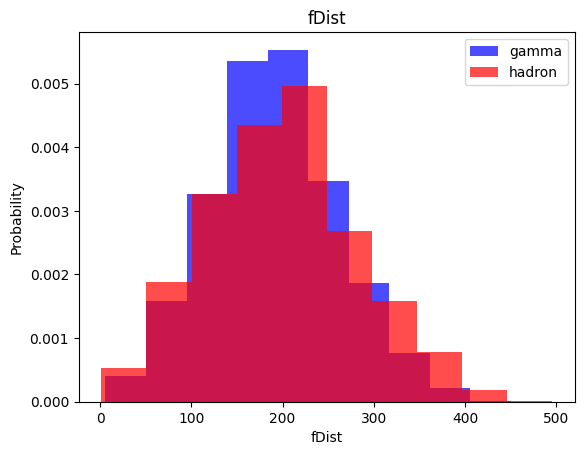

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train, Validation and Test Data Sets

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # -1 = len(y) (reshape is done to make 2-D array because y itself is a 1-D array, np really think about dimension)
  return data, X,y



In [12]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
4037   20.5359  12.1304  2.4289  0.5177  0.2812   -2.2525   9.8922  -10.9555   
13408  19.1962   7.2453  2.6031  0.7656  0.6172   13.8052  19.1667   -1.4198   
8499   18.0424   6.8555  2.3395  0.8650  0.4554    8.4732 -10.8729   -5.2541   
968    20.6484   6.9116  2.1319  0.7675  0.4391   20.9065  14.3220    5.8024   
7977   25.5917  14.8809  2.5065  0.4673  0.2383  -36.5278  11.3536  -12.6528   
...        ...      ...     ...     ...     ...       ...      ...       ...   
10805  48.1464  13.6477  2.5883  0.4258  0.2619   49.9744  41.4617  -12.3916   
4579   86.9843   8.9062  2.4354  0.5064  0.2624 -115.5210  54.0211   -9.0031   
8129   43.7671  29.7969  3.4000  0.1855  0.1037   21.5615  33.4166  -23.0803   
5355   88.5482  34.2291  3.4583  0.2993  0.1624   25.7779 -29.0165  -23.4065   
1507   16.1144  10.7622  2.3096  0.6961  0.4534   -3.2083   1.7450    8.9517   

        fAlpha    fDist  class  
4037   18.3310  238.503      1  
13408  29.2578  251.850      0  
8499    5.4707  196.336      1  
968     7.4140  100.548      1  
7977   36.3940  147.706      1  
...        ...      ...    ...  
10805   8.5500  230.864      1  
4579    5.4597  284.557      1  
8129   27.6220  131.255      1  
5355    1.4057  386.992      1  
1507   79.7630  196.851      1  

[11412 rows x 11 columns]

In [13]:
valid

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
11000   28.8406  10.3802  2.4040  0.5089  0.2978   3.7736  22.7713    7.1500   
18568   20.6225  12.7570  2.3243  0.6310  0.3157  10.9599   7.5173   -9.6023   
5758    29.8242  15.0011  2.7139  0.3594  0.1961  -5.1172   7.1687   -5.4743   
7912    34.8237  18.5148  3.0109  0.3345  0.2072  31.2350  18.6614   -7.5348   
6280    24.5405  15.2548  2.5740  0.3920  0.2040   9.8866  12.2024   13.4030   
...         ...      ...     ...     ...     ...      ...      ...       ...   
10689   26.8476  10.3028  2.4935  0.5201  0.2713  30.7145  22.9917    6.7528   
8003    33.3331  17.4154  3.1432  0.3013  0.1514 -12.3452  20.3642   10.9383   
10645   65.9154  26.1476  3.5573  0.1688  0.0896  20.9779  64.6643  -19.6683   
17601  197.9610  67.4274  3.6290  0.1606  0.0656 -40.3611  41.0059  -61.7557   
550     21.8430   9.9010  2.2014  0.5786  0.3239  -2.8651  15.3604   -9.4155   

        fAlpha     fDist  class  
11000  34.5180  141.2210      1  
18568  31.5365  175.6984      0  
5758   11.3590   74.4211      1  
7912   14.5770  159.6100      1  
6280   18.7850  122.4800      1  
...        ...       ...    ...  
10689   1.4450  138.6000      1  
8003    8.8660  153.9970      1  
10645   3.5743  177.1990      1  
17601  60.3241  297.8173      0  
550     6.2510  155.2820      1  

[3804 rows x 11 columns]

In [14]:
test

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
10101  32.8659  16.3078  2.6707  0.3372  0.2102  -0.8959  21.8321  -14.3271   
1382   13.2147  10.4235  2.1917  0.7910  0.4791 -13.3571  -5.7816  -10.9879   
377    19.6633   9.2678  2.2304  0.6176  0.4147 -20.4804 -14.1482    2.7477   
16497  18.9618  11.3578  2.2708  0.7775  0.4159  26.6424  17.8537   -2.6126   
8705   52.4436  18.3778  2.9053  0.2127  0.1088   2.2138 -43.9999    4.2712   
...        ...      ...     ...     ...     ...      ...      ...       ...   
14969  41.9913  17.9165  2.7508  0.3411  0.1601 -76.7312  41.1898   -4.3532   
11219  21.7031   6.8875  2.0700  0.6979  0.3532 -25.7705  -5.2903    6.5541   
12515  90.0194  18.8496  3.1189  0.2826  0.1580  68.2756  51.8986  -12.8095   
4536   18.4050  10.4112  2.3997  0.5697  0.3127   0.3445  -4.6528   -5.8368   
1591   45.0948  16.4904  2.9963  0.2602  0.1467  -3.6668  13.9027   10.8361   

        fAlpha     fDist  class  
10101   3.5650  101.9430      1  
1382   58.2994  187.1810      1  
377    81.0899  211.9980      1  
16497  34.1441  195.4867      0  
8705    3.3763  182.3500      1  
...        ...       ...    ...  
14969   3.9992  280.8530      0  
11219  10.7580  105.9600      1  
12515  66.5938   71.1545      0  
4536   54.2800   89.8562      1  
1591    4.3610  179.2020      1  

[3804 rows x 11 columns]

In [15]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0])) # have to do over sampling--- go back to def function and add oversampler

7351
4061


In [16]:
# after oversampling
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [17]:
len(y_train)

14702

In [18]:
print(sum(y_train == 1))
print(sum(y_train == 0))


7351
7351


# kNN



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [23]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1305
           1       0.86      0.86      0.86      2499

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [27]:
y_pred = nb_model.predict(X_test)

In [28]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.70      0.53       791
           1       0.90      0.75      0.82      3013

    accuracy                           0.74      3804
   macro avg       0.66      0.72      0.67      3804
weighted avg       0.80      0.74      0.76      3804



# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1369
           1       0.82      0.84      0.83      2435

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM (Support Vector Machine)

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [34]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1309
           1       0.90      0.90      0.90      2495

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net

In [35]:
import tensorflow as tf

In [36]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [37]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 32


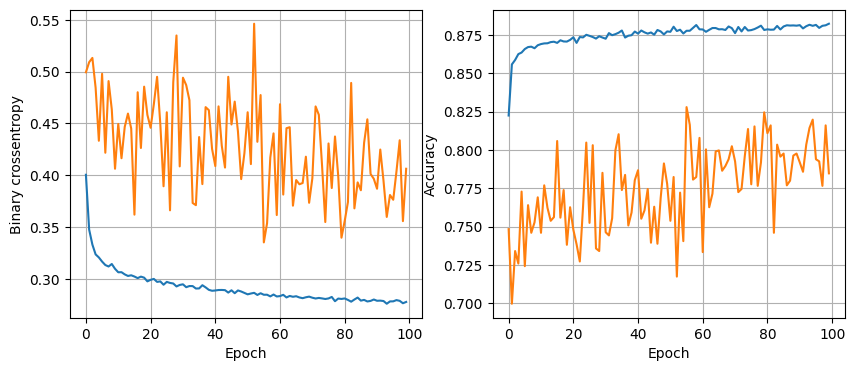

119/119 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.01, batch size 64


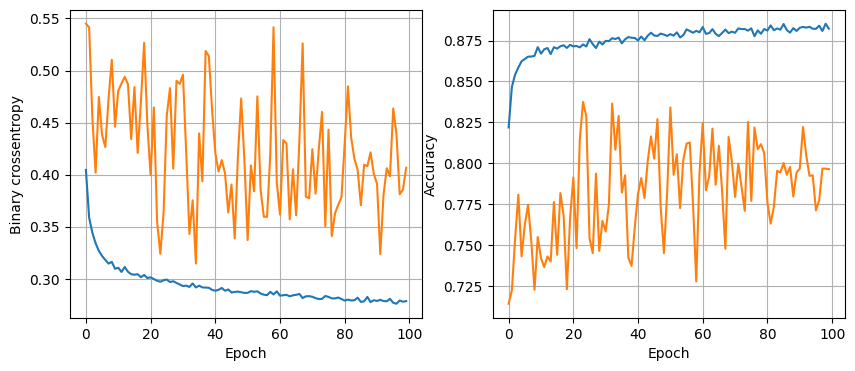

119/119 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8607
16 nodes, dropout 0, lr 0.01, batch size 128


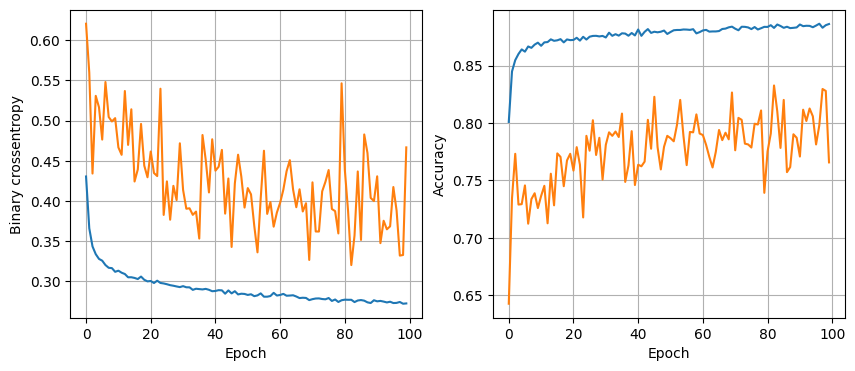

119/119 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.005, batch size 32


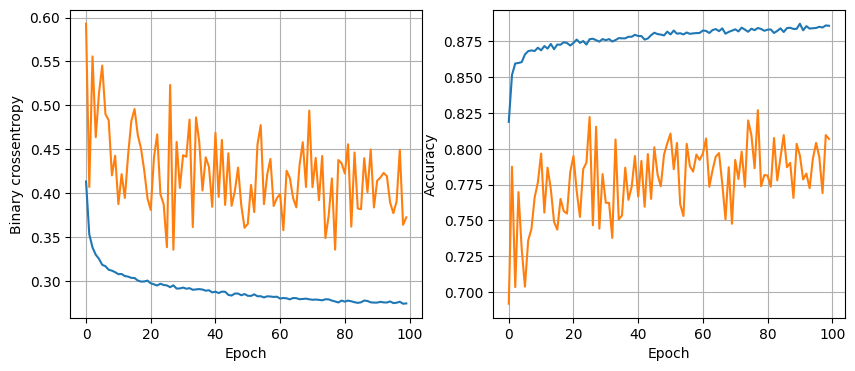

119/119 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.005, batch size 64


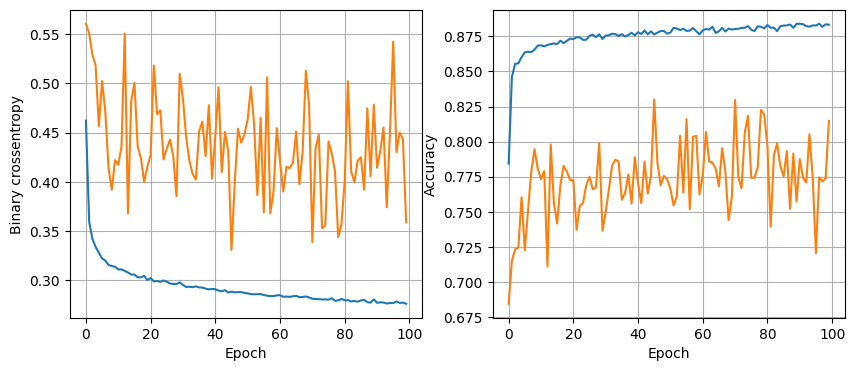

119/119 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8607
16 nodes, dropout 0, lr 0.005, batch size 128


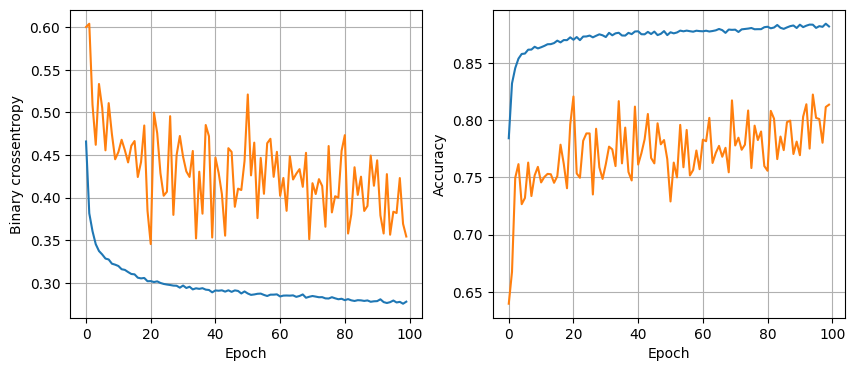

119/119 [==============================] - 1s 5ms/step - loss: 0.3418 - accuracy: 0.8615
16 nodes, dropout 0, lr 0.001, batch size 32


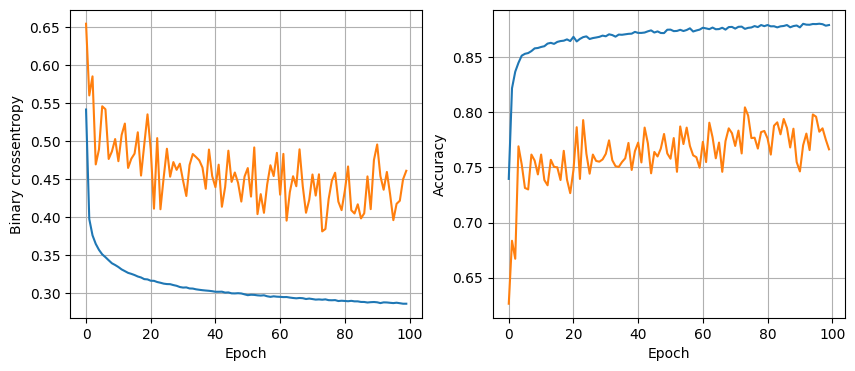

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.001, batch size 64


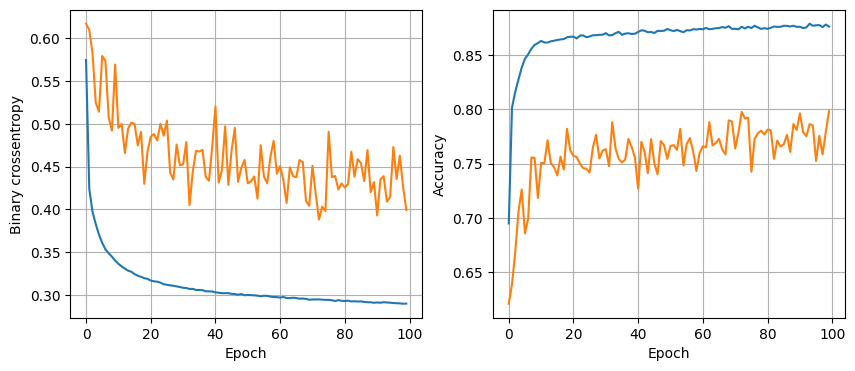

119/119 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8638
16 nodes, dropout 0, lr 0.001, batch size 128


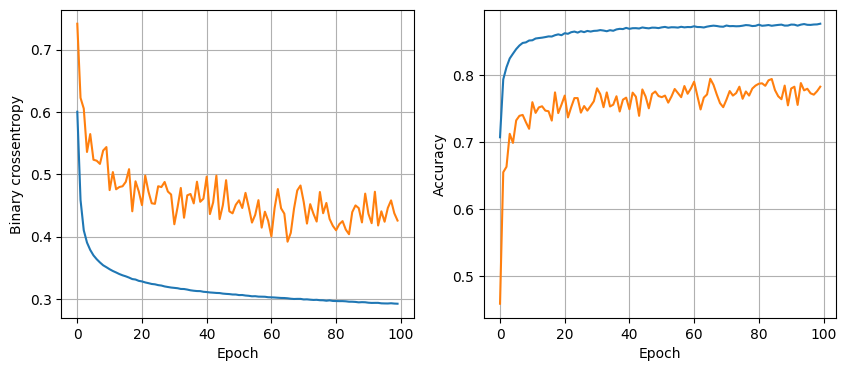

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 32


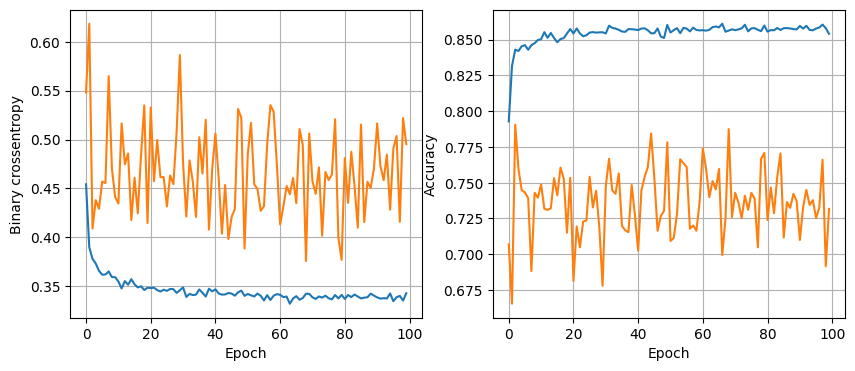

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 64


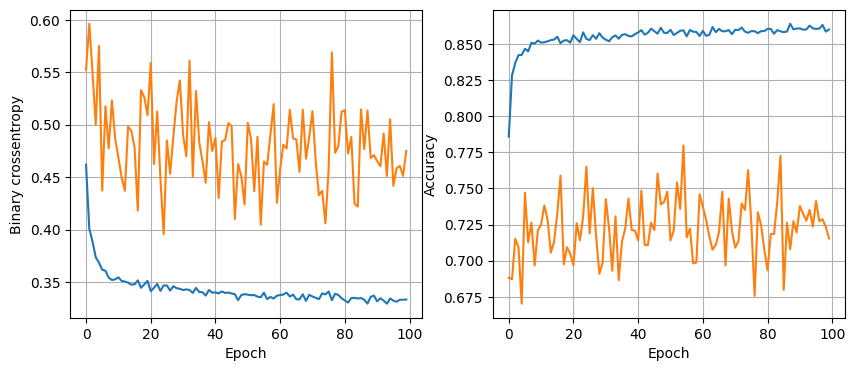

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8630
16 nodes, dropout 0.2, lr 0.01, batch size 128


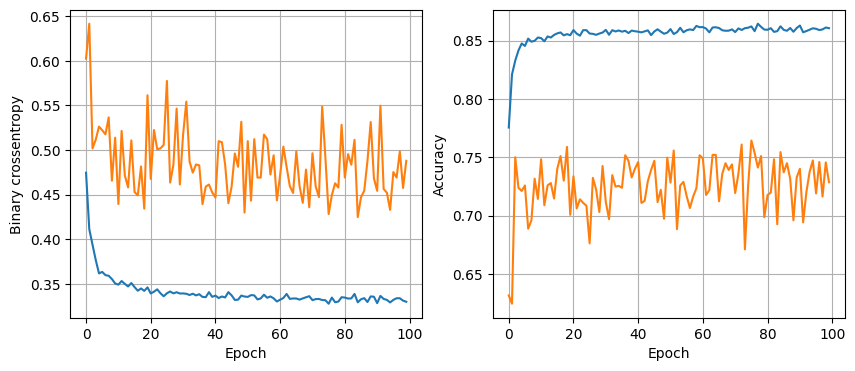

119/119 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.005, batch size 32


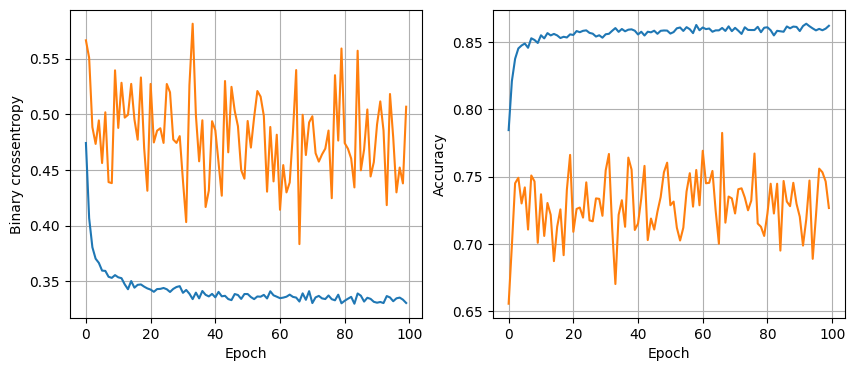

119/119 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8596
16 nodes, dropout 0.2, lr 0.005, batch size 64


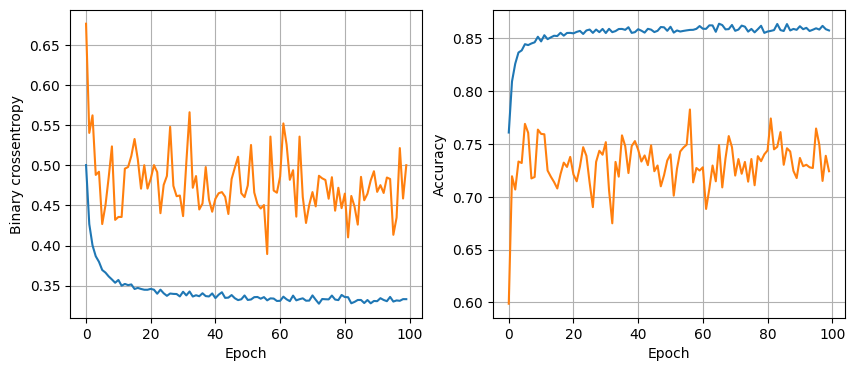

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.005, batch size 128


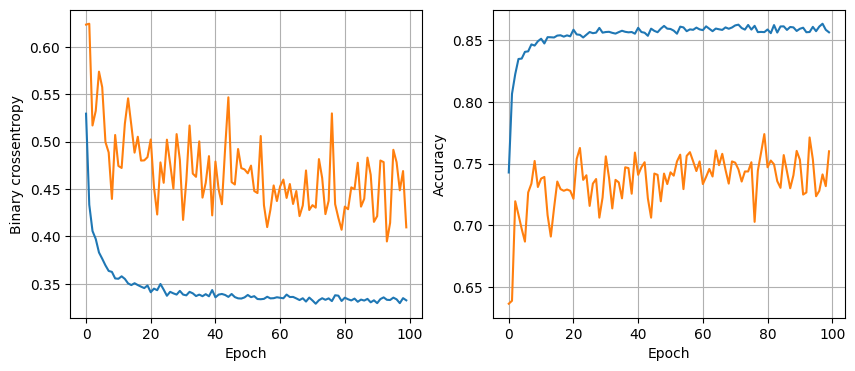

119/119 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.001, batch size 32


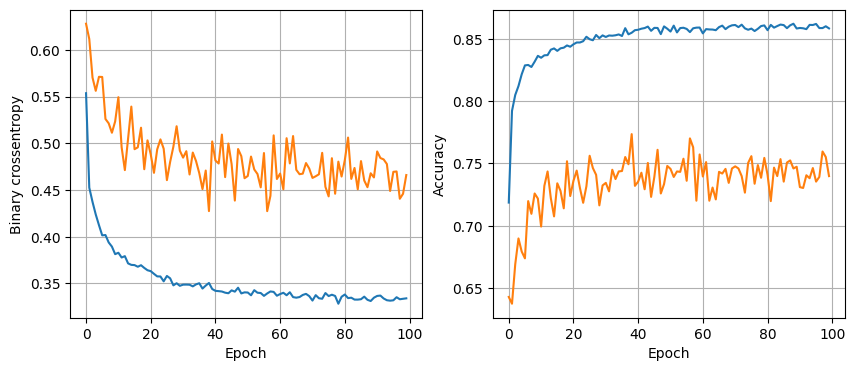

119/119 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 64


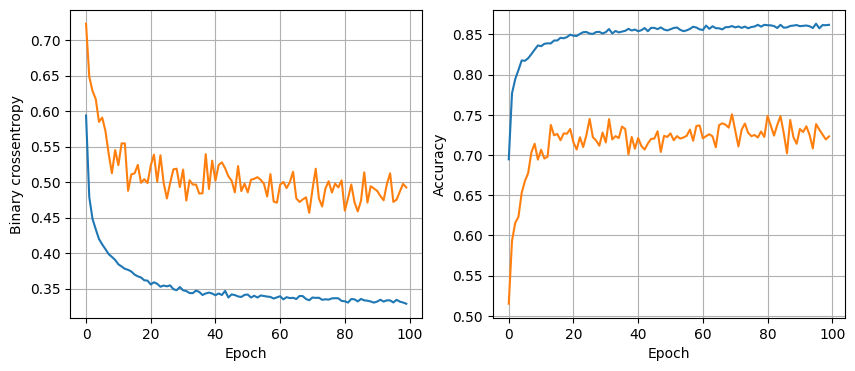

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.001, batch size 128


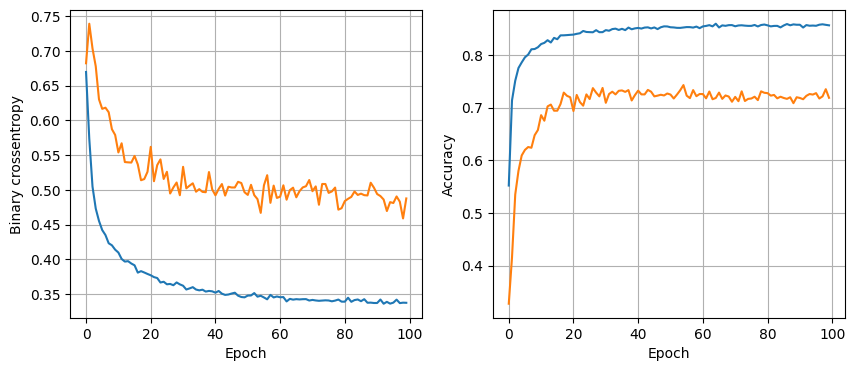

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.01, batch size 32


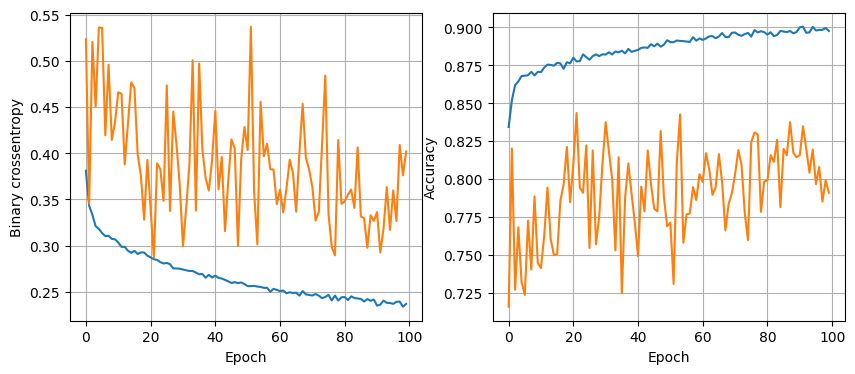

119/119 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8615
32 nodes, dropout 0, lr 0.01, batch size 64


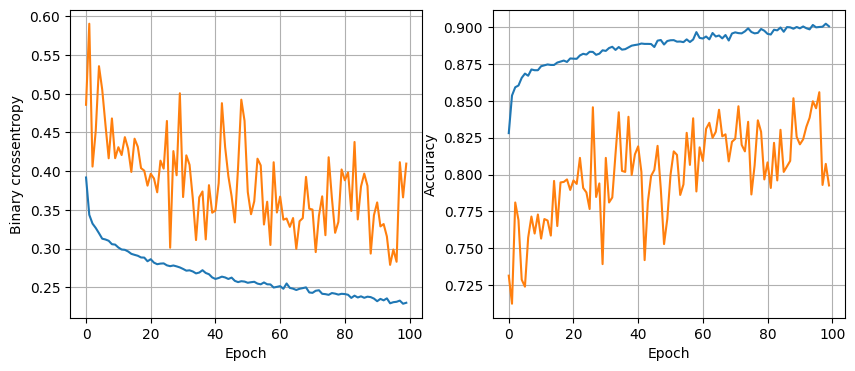

119/119 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.01, batch size 128


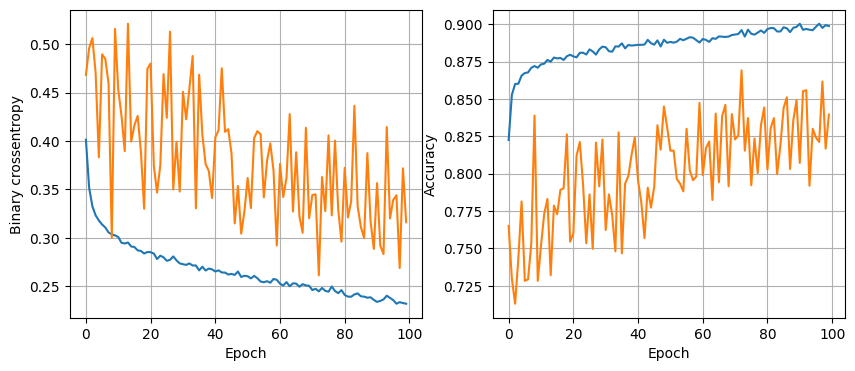

119/119 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.005, batch size 32


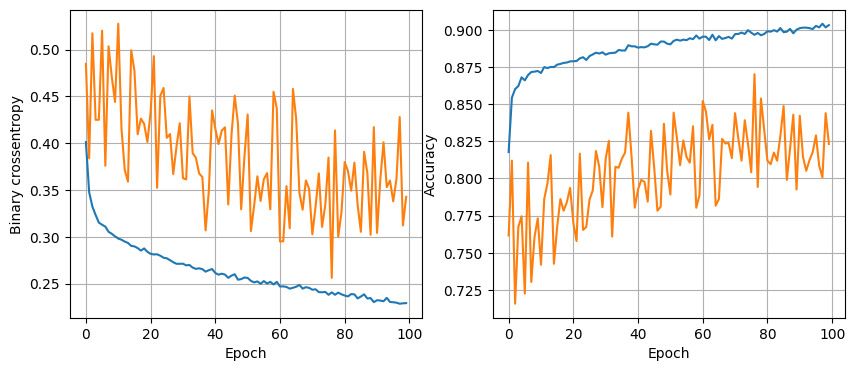

119/119 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8594
32 nodes, dropout 0, lr 0.005, batch size 64


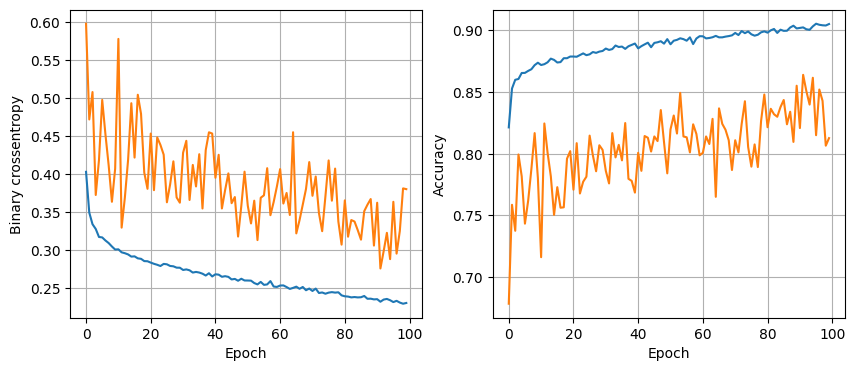

119/119 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8665
32 nodes, dropout 0, lr 0.005, batch size 128


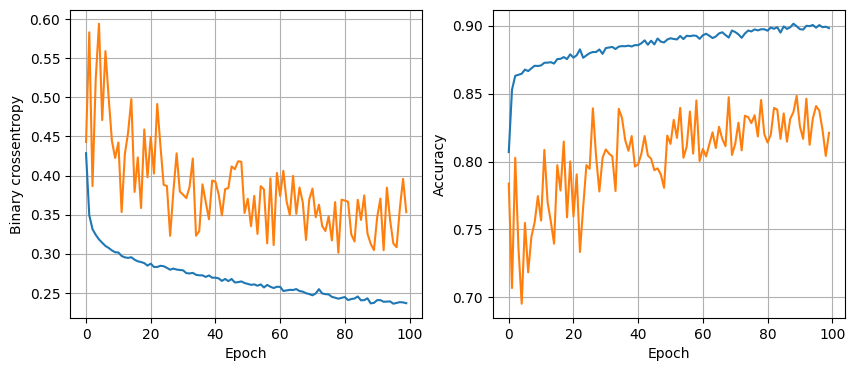

119/119 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8628
32 nodes, dropout 0, lr 0.001, batch size 32


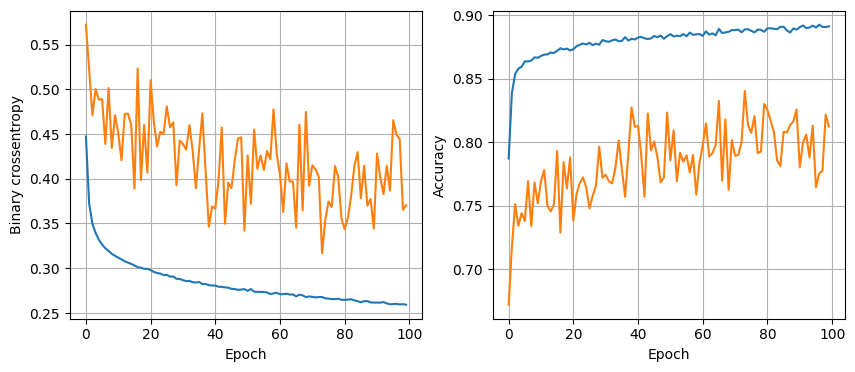

119/119 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8591
32 nodes, dropout 0, lr 0.001, batch size 64


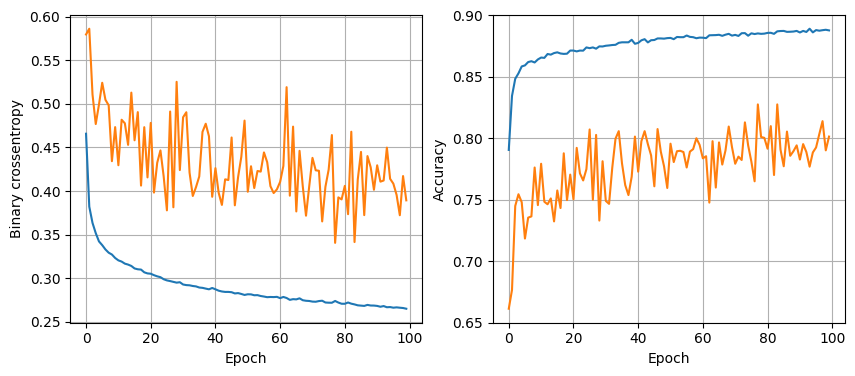

119/119 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.001, batch size 128


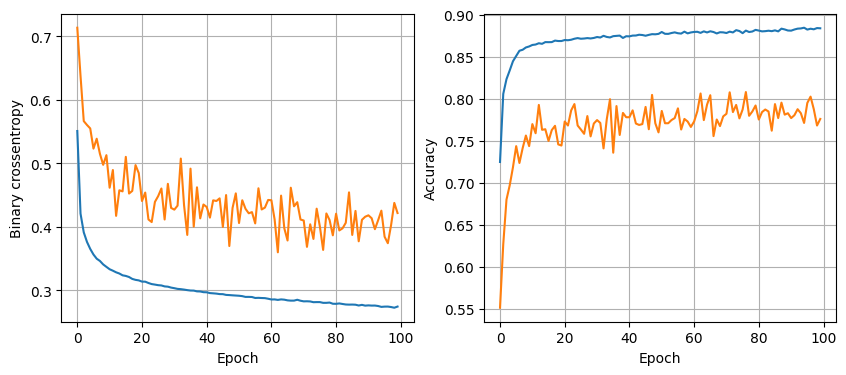

119/119 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.01, batch size 32


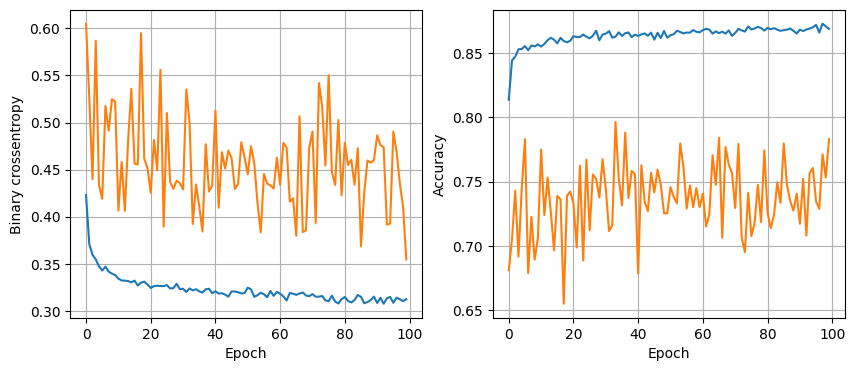

119/119 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8649
32 nodes, dropout 0.2, lr 0.01, batch size 64


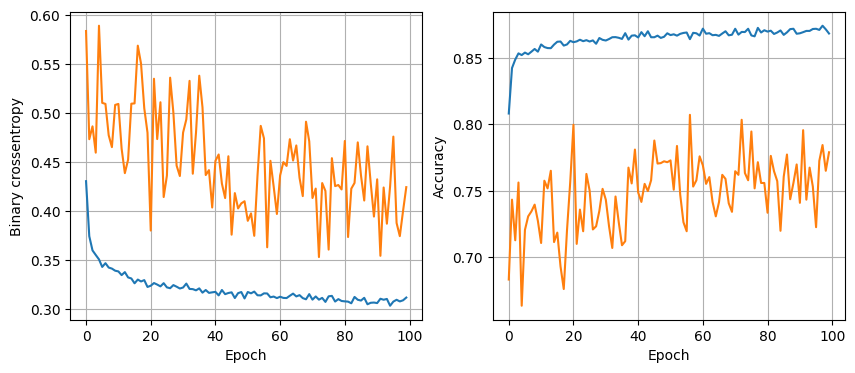

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 128


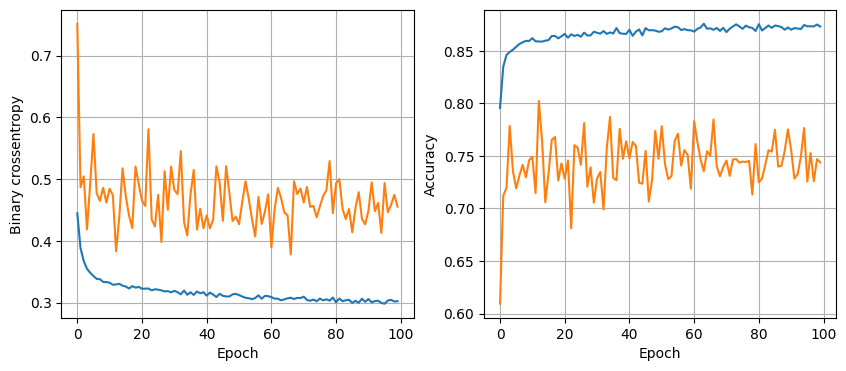

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.005, batch size 32


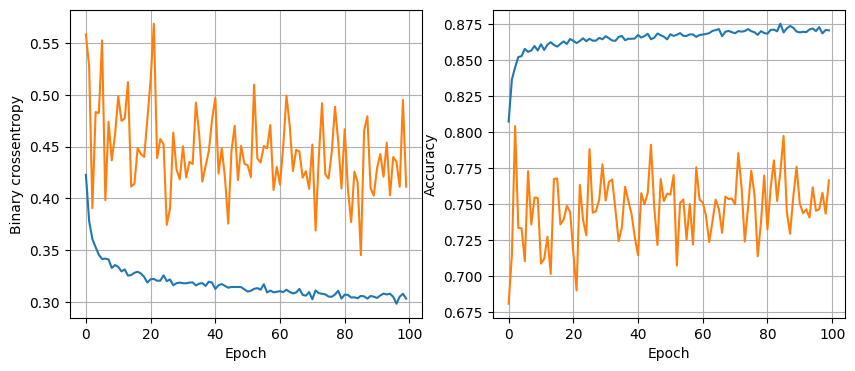

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8657
32 nodes, dropout 0.2, lr 0.005, batch size 64


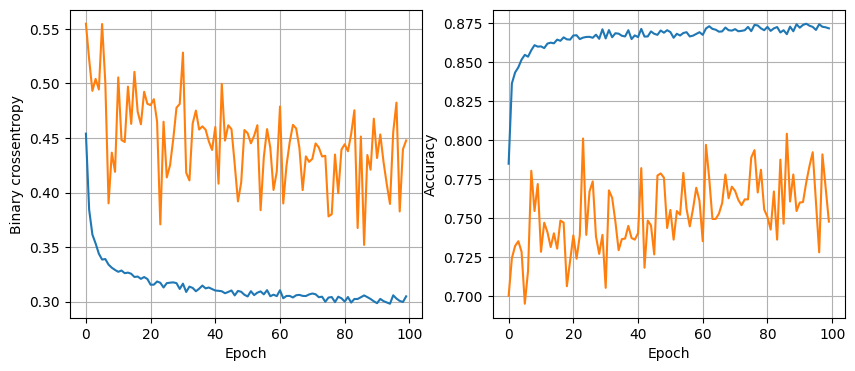

119/119 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8649
32 nodes, dropout 0.2, lr 0.005, batch size 128


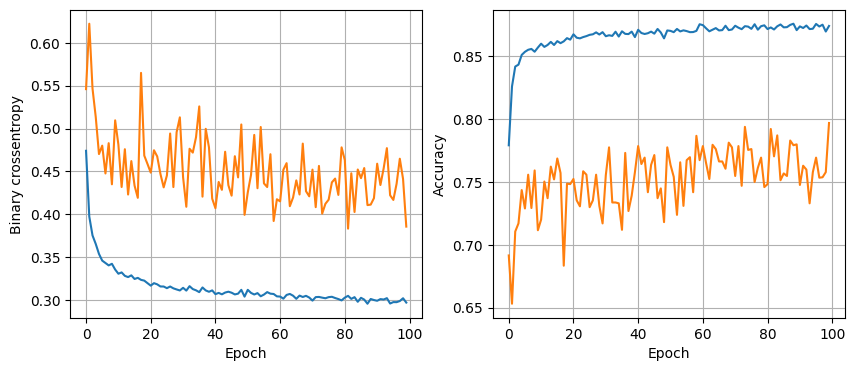

119/119 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.001, batch size 32


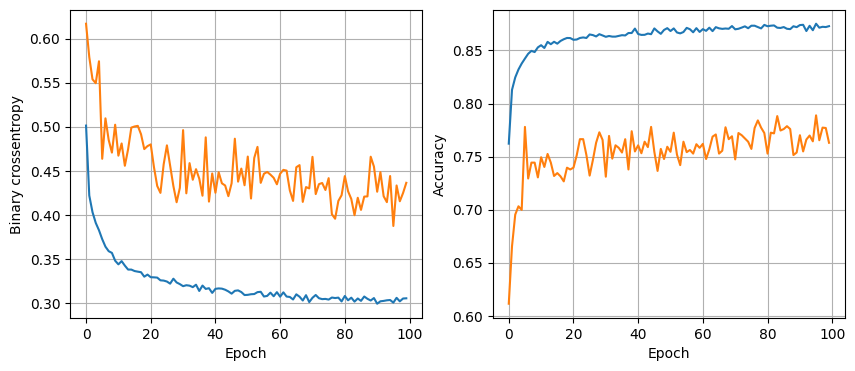

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.001, batch size 64


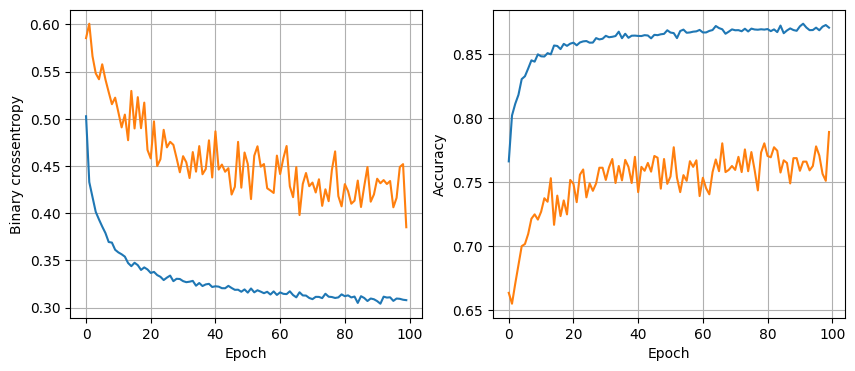

119/119 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.001, batch size 128


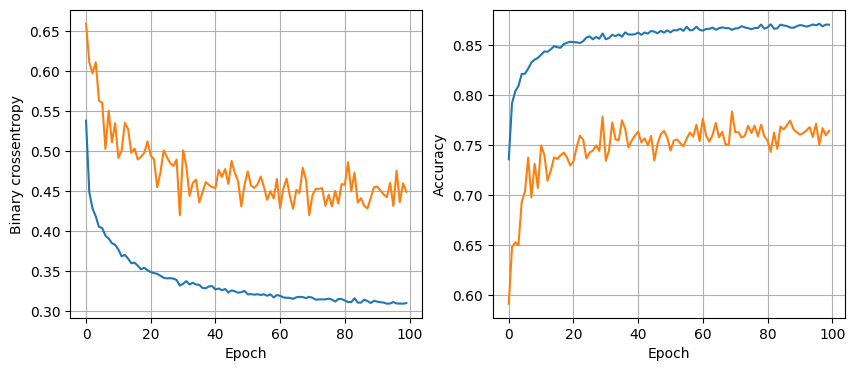

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8701
64 nodes, dropout 0, lr 0.01, batch size 32


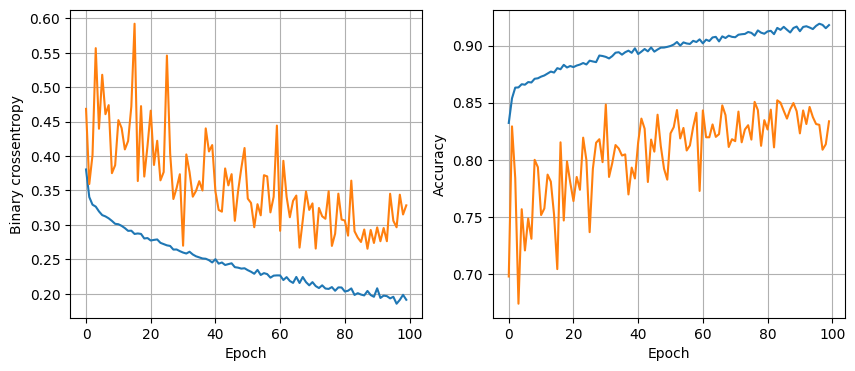

119/119 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.01, batch size 64


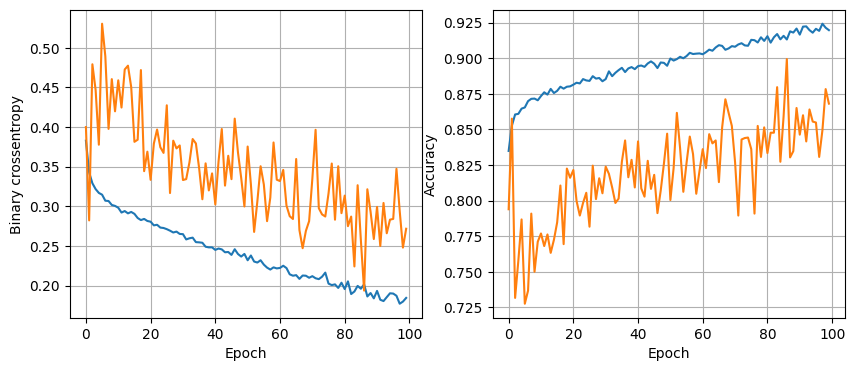

119/119 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.8509
64 nodes, dropout 0, lr 0.01, batch size 128


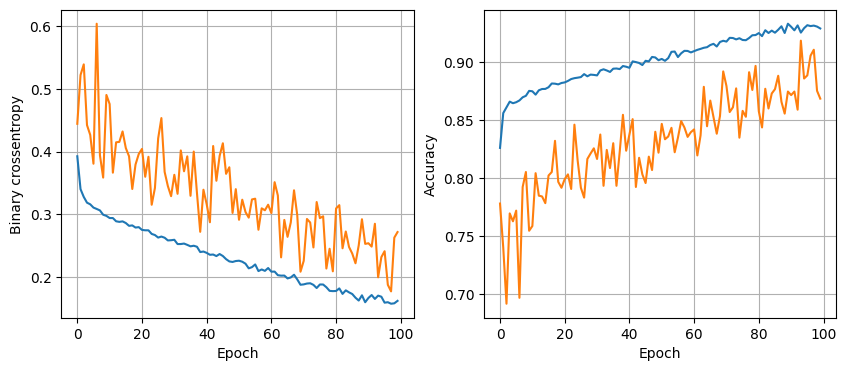

119/119 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.8528
64 nodes, dropout 0, lr 0.005, batch size 32


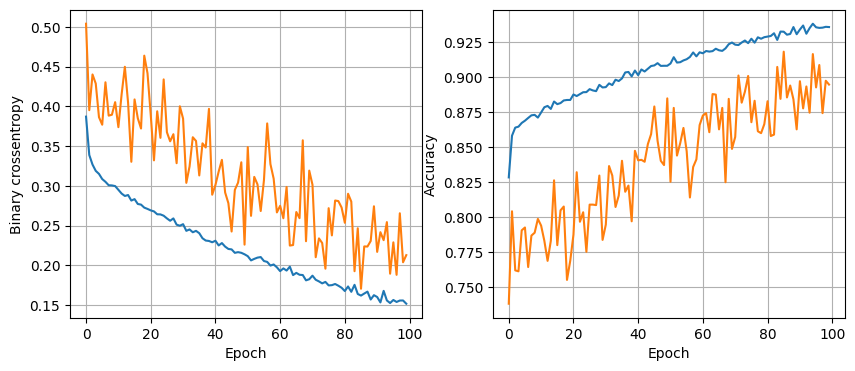

119/119 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.8523
64 nodes, dropout 0, lr 0.005, batch size 64


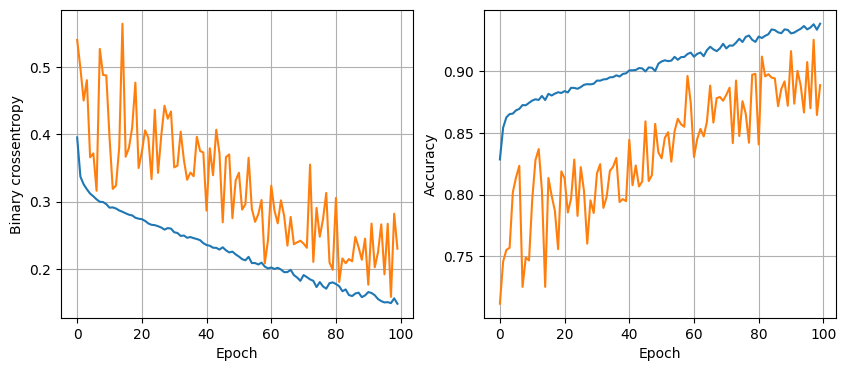

119/119 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.8525
64 nodes, dropout 0, lr 0.005, batch size 128


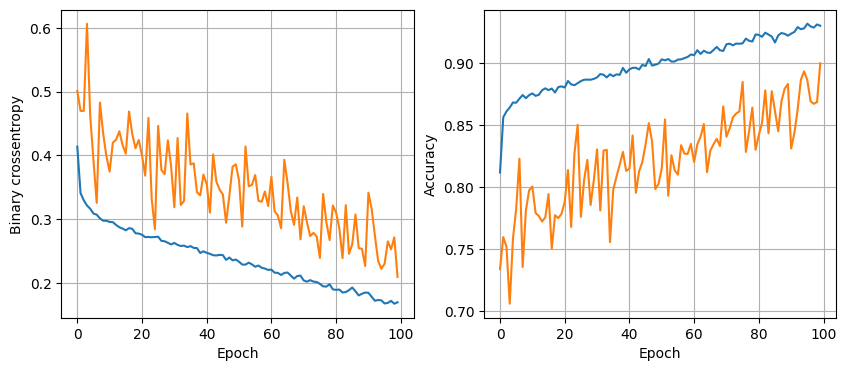

119/119 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.8386
64 nodes, dropout 0, lr 0.001, batch size 32


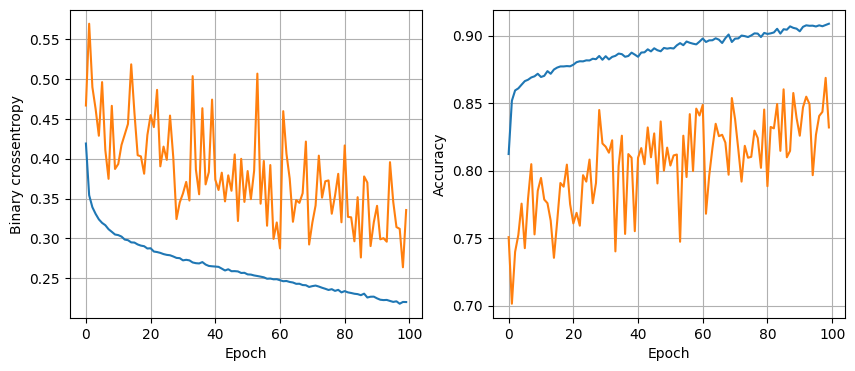

119/119 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.001, batch size 64


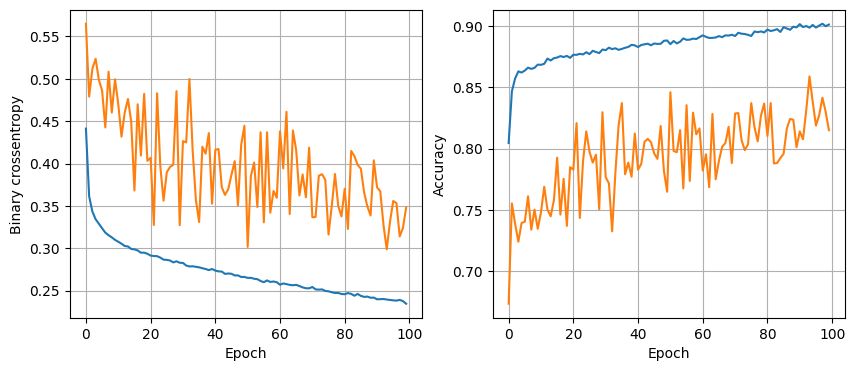

119/119 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8628
64 nodes, dropout 0, lr 0.001, batch size 128


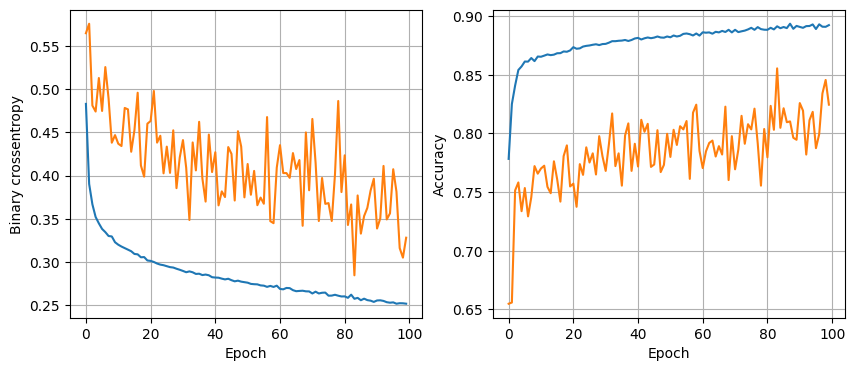

119/119 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8680
64 nodes, dropout 0.2, lr 0.01, batch size 32


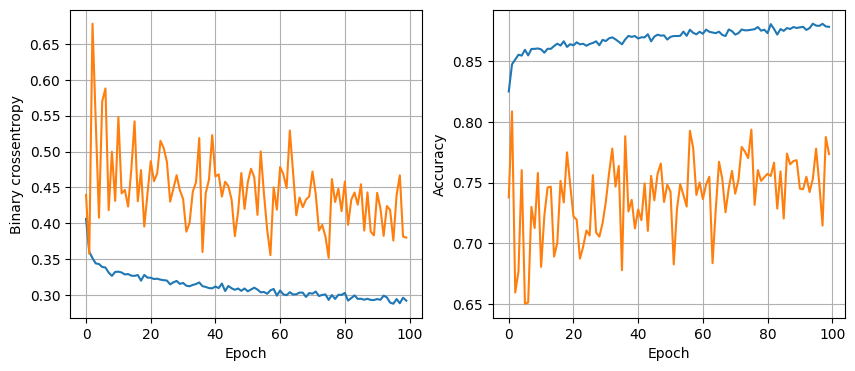

119/119 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8680
64 nodes, dropout 0.2, lr 0.01, batch size 64


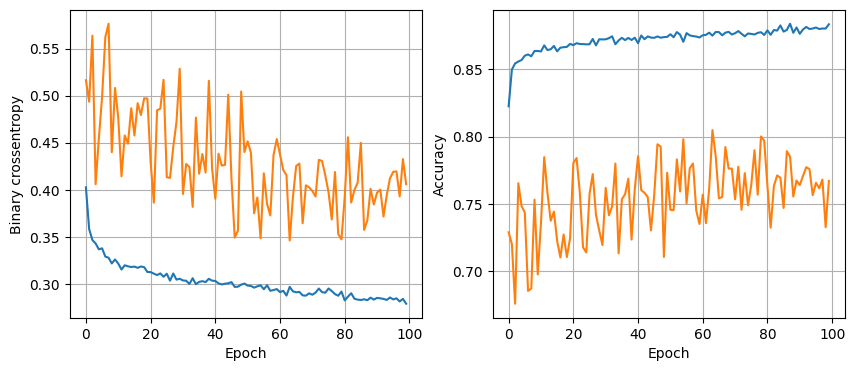

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8654
64 nodes, dropout 0.2, lr 0.01, batch size 128


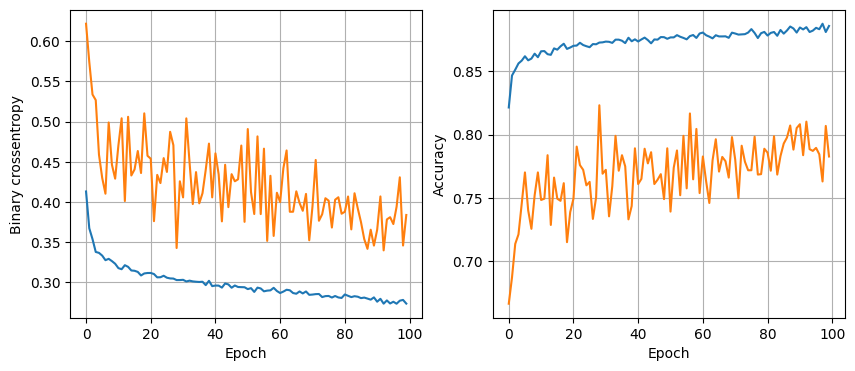

119/119 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8662
64 nodes, dropout 0.2, lr 0.005, batch size 32


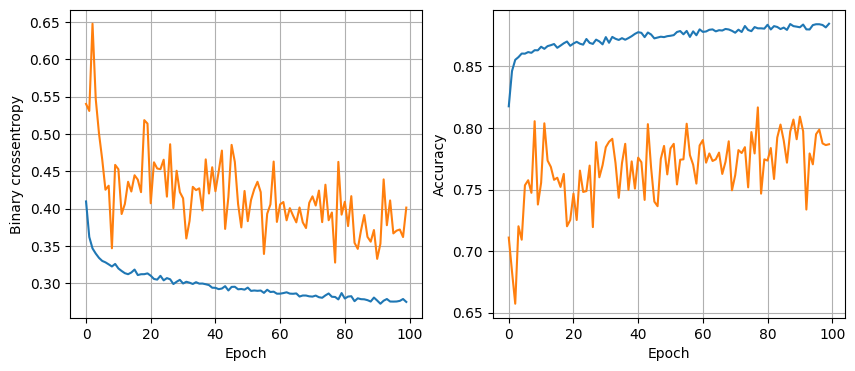

119/119 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8720
64 nodes, dropout 0.2, lr 0.005, batch size 64


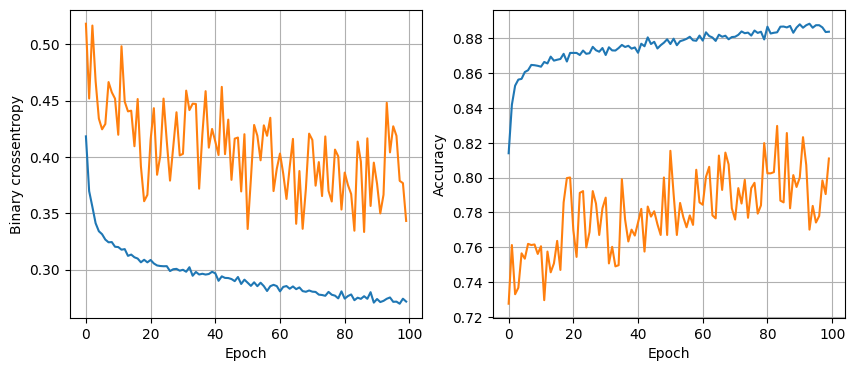

119/119 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8691
64 nodes, dropout 0.2, lr 0.005, batch size 128


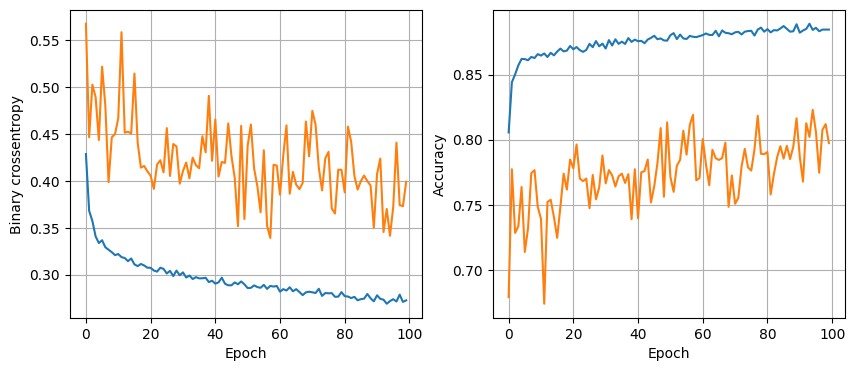

119/119 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.001, batch size 32


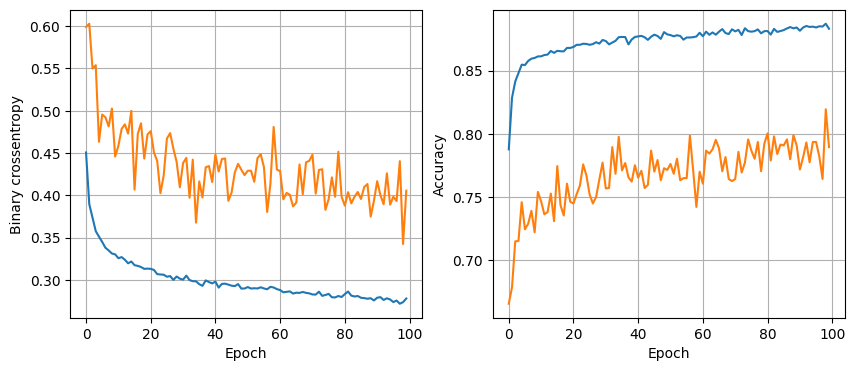

119/119 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch size 64


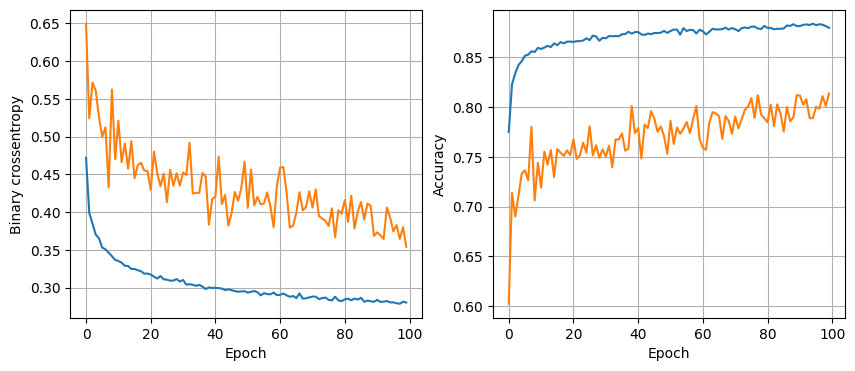

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.001, batch size 128


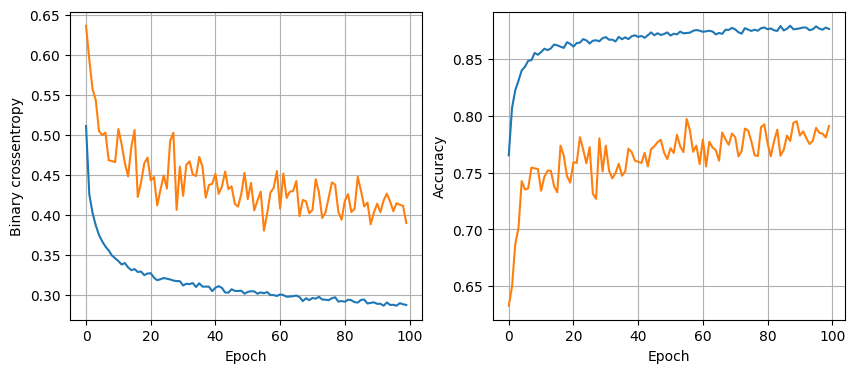

119/119 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8725


In [38]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [39]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1316
           1       0.89      0.95      0.92      2488

    accuracy                           0.89      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.89      0.89      0.89      3804



# AUTO ML

In [10]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [11]:
#To import all Classification related Pycaret libraries
from pycaret.classification import *

In [12]:
# Setting up the classification ML experiment
classification_model_setup = setup(df, target = 'class', normalize = True,
                                   remove_outliers = True,
                                   transformation_method='quantile',
                                   train_size = 0.7)

In [13]:
# Running the multiple algorithms
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=652, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [14]:
# Creating the model with the best algorithm based on the above results
model = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# Method 2 - Installing the H2O AI Package for Advanced ML and Deep Learning packages
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=9138f5062de1c2cda865f4aa51dbde50ac6307b82297629671088b3329782b29
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o


In [16]:
# Importing into current Working Session
import h2o
from h2o.automl import H2OAutoML

In [17]:
# Initializing the H2O Server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd9u6cwy5
  JVM stdout: /tmp/tmpd9u6cwy5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd9u6cwy5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_3rr5vj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [19]:
# Converting Pandas dataframe to H2O dataframe
#df1 = pd.read_csv('')
hf = h2o.H2OFrame(df)
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


fLength    fWidth    fSize    fConc    fConc1     fAsym    fM3Long    fM3Trans    fAlpha     fDist    class
---------  --------  -------  -------  --------  --------  ---------  ----------  --------  --------  -------
  28.7967   16.0021   2.6449   0.3918    0.1982   27.7004    22.011      -8.2027   40.092    81.8828        1
  31.6036   11.7235   2.5185   0.5303    0.3773   26.2722    23.8238     -9.9574    6.3609  205.261         1
 162.052   136.031    4.0612   0.0374    0.0187  116.741    -64.858     -45.216    76.96    256.788         1
  23.8172    9.5728   2.3385   0.6147    0.3922   27.2107    -6.4633     -7.1513   10.449   116.737         1
  75.1362   30.9205   3.1611   0.3168    0.1832   -5.5277    28.5525     21.8393    4.648   356.462         1
  51.624    21.1502   2.9085   0.242     0.134    50.8761    43.1887      9.8145    3.613   238.098         1
  48.2468   17.3565   3.0332   0.2529    0.1515    8.573     38.0957     10.5868    4.792   219.087         1
  26.7897   13.7595   2.5521   0.4236    0.2174   29.6339    20.456      -2.9292    0.812   237.134         1
  96.2327   46.5165   4.154    0.0779    0.039   110.355     85.0486     43.1844    4.854   248.226         1
  46.7619   15.1993   2.5786   0.3377    0.1913   24.7548    43.8771     -6.6812    7.875   102.251         1
[19020 rows x 11 columns]

In [20]:
# Splitting the data to train and test
splits = hf.split_frame(ratios = [0.8])
# Assigning first split to train variable
train = splits[0]
# Assigning first split to test variable
test = splits[1]

In [21]:
# Invoking the Auto advanced ML and Deep learning algorithms restricting run time to 60 seconds
aml = H2OAutoML(max_runtime_secs = 60)
# Training using train data and testing with test data
aml.train(y = 'class', training_frame = train)

AutoML progress: |
12:05:42.926: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████████████████
12:06:02.556: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
12:06:08.990: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████████████████
12:06:28.790: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240617_120542


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/8
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.05755728349623762
RMSE: 0.23991099077832517
MAE: 0.15898171390753466
RMSLE: 0.1721092421964961
Mean Residual Deviance: 0.05755728349623762
R^2: 0.7487035204408713
Null degrees of freedom: 10001
Residual degrees of freedom: 9996
Null deviance: 2290.9156879128045
Residual deviance: 575.6879495293687
AIC: -157.0094546997349

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.09423193841711847
RMSE: 0.30697221114804263
MAE: 0.20292542696964277
RMSLE: 0.2157833860234492
Mean Residual Deviance: 0.09423193841711847
R^2: 0.5874773547117973
Null degrees of freedom: 15138
Residual degrees of freedom: 15133
Null deviance: 3458.903895769772
Residual deviance: 1426.5773156967564
AIC: 7218.361861908661

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     1454.38    49.7146     1446.61       1524.94       1452.63       1385.26       1462.45
loglikelihood           0          0           0             0             0             0             0
mae                     0.202951   0.00233246  0.20242       0.204619      0.200564      0.201105      0.206048
mean_residual_deviance  0.0942564  0.00190398  0.0941492     0.095264      0.094012      0.0913595     0.0964974
mse                     0.0942564  0.00190398  0.0941492     0.095264      0.094012      0.0913595     0.0964974
null_deviance           691.781    14.9773     678.597       702.64        703.006       702.162       672.499
r2                      0.587247   0.0085807   0.581143      0.57901       0.593461      0.598984      0.583637
residual_deviance       285.315    6.2212      283.954       295.699       285.608       281.57        279.746
rmse                    0.306999   0.00310799  0.306837      0.308649      0.306614      0.302257      0.31064
rmsle                   0.215817   0.00271739  0.215298      0.215702      0.216137      0.212159      0.219788

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [22]:
# Displaying the best algorithm scores
aml.leaderboard.head(10)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240617_120542     0.306972  0.0942319  0.202925  0.215783                 0.0942319
StackedEnsemble_BestOfFamily_2_AutoML_1_20240617_120542  0.307522  0.0945698  0.20198   0.215945                 0.0945698
StackedEnsemble_BestOfFamily_1_AutoML_1_20240617_120542  0.309285  0.0956573  0.205542  0.217379                 0.0956573
GBM_1_AutoML_1_20240617_120542                           0.318587  0.101497   0.231835  0.225009                 0.101497
XGBoost_1_AutoML_1_20240617_120542                       0.320249  0.102559   0.210981  0.22337                  0.102559
XGBoost_2_AutoML_1_20240617_120542                       0.351033  0.123224   0.300182  0.243045                 0.123224
DRF_1_AutoML_1_20240617_120542                           0.357858  0.128062   0.195502  0.247595                 0.128062
GLM_1_AutoML_1_20240617_120542                           0.391793  0.153502   0.320287  0.281512                 0.153502
GBM_4_AutoML_1_20240617_120542                           0.406109  0.164925   0.379335  0.289716                 0.164925
GBM_2_AutoML_1_20240617_120542                           0.409147  0.167401   0.382129  0.291637                 0.167401
[10 rows x 6 columns]

In [23]:
# Getting the prediction metrics
perf = aml.leader.model_performance(test)
# Displaying the performance metrics
perf

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09753454374173275
RMSE: 0.31230520927729133
MAE: 0.20786492406536033
RMSLE: 0.2184556703637085
Mean Residual Deviance: 0.09753454374173275
R^2: 0.5688478803982697
Null degrees of freedom: 3880
Residual degrees of freedom: 3875
Null deviance: 878.1627407588088
Residual deviance: 378.5315642616648
AIC: 1994.584510582757